**Работа с реальными данными**

# Импорт библиотек

In [60]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn
from sklearn.preprocessing import LabelEncoder# Импортируем LabelEncoder от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [61]:
import warnings
warnings.filterwarnings('ignore')

# Набор данных

**Предсказание цены на дом**

Набор данных представляет собой 1460 строк и 79 переменных, описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова.

С помощью этого датасета решается задача регрессии - предсказать окончательную стоимость дома (перменная SalePrice).

Наша цель - увидеть, как те или иные признаки влияют на стоимость дома, а также их взаимосвязь друг с другом.

Так как признаков очень много, выберу по 5 самых интересующих меня категориальных и числовых признаков для будующей работы.

*Выбранные числовые признаки:*

LotArea (площадь участка в квадратных футах)

YearBuilt (год постройки)

BedroomAbvGr (кол-во спален выше уровня земли)

GarageArea (площадь гаража в квадратных футах)

MoSold (месяц продажи)

*Выбранные категориальные признаки:*

Street (тип дороги, ведущей к участку)

Utilities (тип доступных коммунальных услуг)

LotConfig (конфигурация участка)

Condition1 (близость к различным условиям)

RoofStyle (тип крыши)

Нашей целевой переменной станет категориальный признак LotConfig

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/dariaValerievna/Analytics/refs/heads/dariaValerievna-homework-1/train.csv', delimiter = ',') # считываем файл из интернета
df #выведем DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
#Число каждого значения признака LotConfig
df['LotConfig'].value_counts()

,count
LotConfig,
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


In [64]:
#запишем выбранные признаки в новые переменные
cat_columns_new = ['Street', 'Utilities', 'LotConfig', 'Condition1', 'RoofStyle']
num_columns_new = ['LotArea', 'YearBuilt', 'BedroomAbvGr', 'GarageArea', 'MoSold', 'SalePrice']

#удаляем из датафрейма остальные признаки
df = df.drop(columns=[col for col in df.columns if (col not in cat_columns_new) and (col not in num_columns_new)])

#выведем получившийся датафрейм
df

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,8450,Pave,AllPub,Inside,Norm,2003,Gable,3,548,2,208500
1,9600,Pave,AllPub,FR2,Feedr,1976,Gable,3,460,5,181500
2,11250,Pave,AllPub,Inside,Norm,2001,Gable,3,608,9,223500
3,9550,Pave,AllPub,Corner,Norm,1915,Gable,3,642,2,140000
4,14260,Pave,AllPub,FR2,Norm,2000,Gable,4,836,12,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1456,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1457,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1458,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125


# Предварительная обработка данных

Копирую код из прошлой домашки:

https://colab.research.google.com/drive/1cO4fyxe5R_69-4DC769a_bDC9E4djclk?usp=sharing

##Предварительная обработка числовых признаков

**Нормализация**

In [65]:
DF_norm  = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
Xmin = df[num_columns_new].min() # находим минимум (для каждого числового признака)
Xmax = df[num_columns_new].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF_norm[num_columns_new] = (df[num_columns_new]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

**Стандартизация**

In [66]:
DF_scaled = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
M = df[num_columns_new].mean() # находим среднее (для каждого числового признака)
STD = df[num_columns_new].std() # находим стандартное отклонение (для каждого числового признака)
DF_scaled[num_columns_new] = (df[num_columns_new]-M)/STD # реализуем стандартизацию. матричные операции работают

**Степенное преобразование**

In [67]:
DF_pow_trans = df.copy()

pt = PowerTransformer()

pt.fit(DF_pow_trans[num_columns_new]);

power = pt.transform(DF_pow_trans[num_columns_new])
df_power = pd.DataFrame(power, columns= num_columns_new)

**Визуализируем**

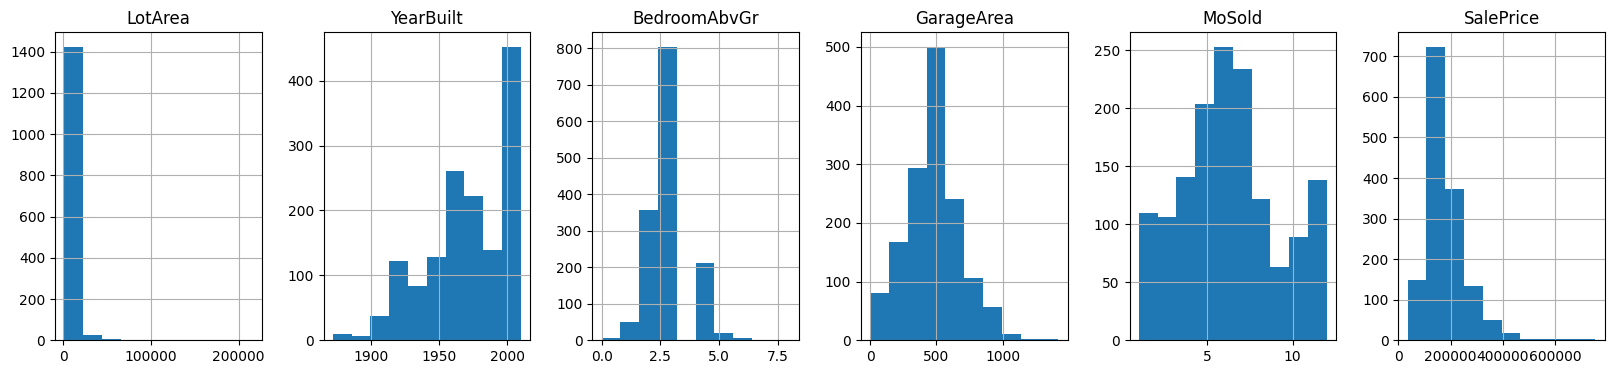

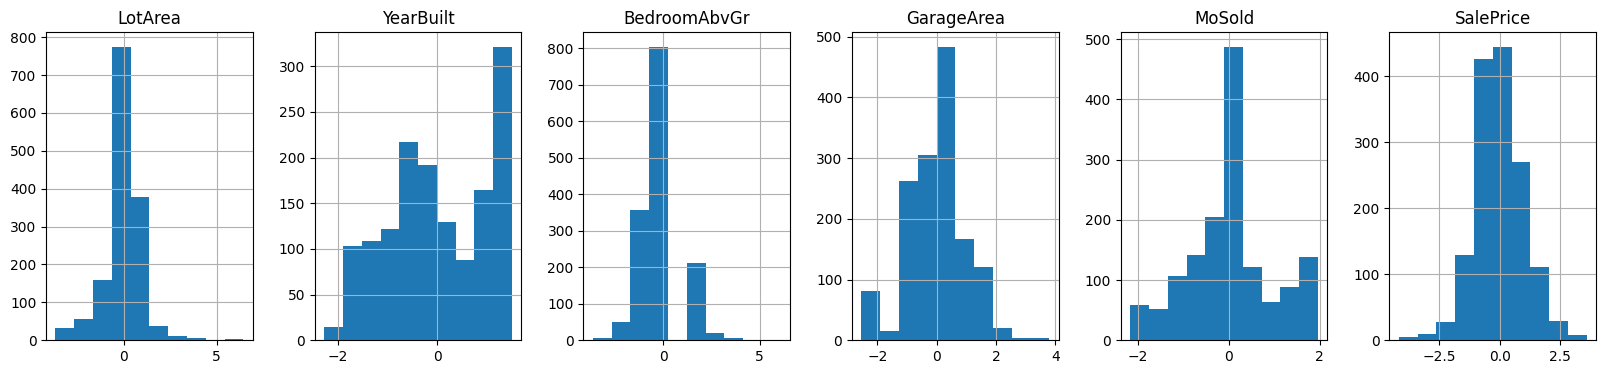

In [68]:
df[num_columns_new].hist(figsize = (20,4), layout= (1,6)); #исходные графики
df_power[num_columns_new].hist(figsize = (20,4), layout= (1,6));#преобразованные

##Предварительная обработка категориальных признаков

**Порядковое кодирование**

In [69]:
DF = df.copy()
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns_new]);

Ordinal_encoded = ordinal.transform(DF[cat_columns_new])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns_new)

**One-hot кодирование многозначных признаков**

In [70]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output= False)
ohe.fit(DF[cat_columns_new]);

ohe_feat = ohe.transform(DF[cat_columns_new])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

##Pipeline

In [71]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

Добавляем SalePrice и убираем LotConfig

In [72]:
num_pipe_lotArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler())
])
num_lotArea = ['LotArea']

num_pipe_GarArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler()),
     ('power', PowerTransformer())
])
num_GarArea = ['GarageArea']

num_pipe_BAG = Pipeline([
    ('power', PowerTransformer())
])
num_BAG = ['BedroomAbvGr']

num_pipe_YB = Pipeline([
    ('power', PowerTransformer())
])
num_YB = ['YearBuilt']

num_pipe_SP = Pipeline([
    ('power', PowerTransformer())
])
num_SP = ['SalePrice']

num_pipe_moSold = Pipeline([
    ('scaler', StandardScaler())
])
num_moSold = ['MoSold']

cat_pipe_street = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_street = ['Street']

cat_pipe_util = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_util = ['Utilities']

cat_pipe_lotCon = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_lotCon = ['LotConfig']

cat_pipe_con1 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_con1 = ['Condition1']

cat_pipe_roofSt = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_roofSt = ['RoofStyle']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
    ('num_SP', num_pipe_SP, num_SP)
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
    ('cat_street', cat_pipe_street, cat_street),
    ('cat_util', cat_pipe_util, cat_util),
    ('cat_con1', cat_pipe_con1, cat_con1),
    ('cat_roofSt', cat_pipe_roofSt, cat_roofSt),
])

In [73]:
#численные колонки
columns_num = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    num_SP])

In [74]:
preprocessors_all.fit(DF)

ColumnTransformer(transformers=[('num_lotArea',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler())]),
                                 ['LotArea']),
                                ('num_GarArea',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['GarageArea']),
                                ('num_BAG',
                                 Pipeline(steps=[('power',
                                                  Po...
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Utilities']),
                                ('cat_con1',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Condition1']),
                                ('cat_roofSt',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['RoofStyle'])])

# Обучение модели логистической регрессии

In [75]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.metrics import ConfusionMatrixDisplay # матрица ошибок


In [76]:
# не забываем удалить целевую переменную LotConfig из признаков
X,y = DF.drop(columns = ['LotConfig']), DF['LotConfig']

##Приводим целевые метки к цифровому значению

In [77]:
Label = LabelEncoder()
Label.fit(y) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object)

В данном случае у нас Corner - 0, CulDSac - 1, FR2 - 2 и т.д

In [78]:
target = Label.transform(y) # преобразуем и сохраняем в новую переменную
print(target)

[4 2 4 ... 4 4 4]


In [79]:
# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, target,
                                                    test_size=0.3,
                                                    random_state=42)

## Оценим модель с использованием только числовых данных

**Преобразуем данные**

In [80]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

**Обучаем модель**

In [81]:
model = LogisticRegression(random_state = 42, multi_class='multinomial')

model.fit(X_train_prep, y_train);

##Подготовим несколько функций для анализа обученной модели

**вытаскивание коэффициентов из модели**

In [82]:
def get_coefs (model):
    B0=model.intercept_[0]
    B=model.coef_[0]
    return B0, B

**написание модели**

In [83]:
def print_model (B0,B,features_names):
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

**визуализации весов в виде столбчатых диаграмм**

In [84]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

##Напишем уравнение модели

In [85]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
1.223+0.04*LotArea+0.11*GarageArea+0.03*BedroomAbvGr-0.43*YearBuilt-0.11*MoSold-0.04*SalePrice


##Визуализируем веса в виде столбчатых диаграмм

In [86]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Положительные веса у LotArea и GarageArea могут означать, что более крупные площади участка и гаража повышают вероятность принадлежности здания к определённому типу конфигурации, что звучит логично.

Отрицательный вес YearBuilt указывает на то, что более старые здания с большей вероятностью относятся к определенному типу конфигурации. Возможно, более старые здания имеют уникальные черты, которые отличают их конфигурацию от современных построек.

Негативное влияние MoSold может говорить о том, что время продажи в году также связано с определенными типами конфигурации зданий. Вероятно, некоторые конфигурации более популярны для продажи в определенные периоды.

# Оценка метрик

In [87]:
#расчет метрики
def calculate_metric(model_pipe, X, y, metric = f1_score, average='weighted'):
    y_model = model_pipe.predict(X)
    return metric(y, y_model, average=average)

In [88]:
print(f"f1 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

f1 на тренировочной выборке: 0.5784
f1 на валидационной выборке: 0.6906


In [89]:
print(classification_report(y_val, model.predict(X_val_prep), target_names=Label.classes_))

              precision    recall  f1-score   support

      Corner       0.00      0.00      0.00        64
     CulDSac       0.50      0.11      0.17        19
         FR2       0.00      0.00      0.00        12
         FR3       0.00      0.00      0.00         1
      Inside       0.78      0.99      0.87       342

    accuracy                           0.78       438
   macro avg       0.26      0.22      0.21       438
weighted avg       0.63      0.78      0.69       438



Модель показывает хорошее качество на основном классе Inside (f1-score = 0.87), обеспечивая высокую общую точность (accuracy = 0.78) на валидационной выборке. Однако её эффективность на других классах (например, Corner, CulDSac, FR2, FR3) крайне низкая, что отражается на низком значении F1 (0.21). Скорее всего, это происходит из-за наличия редких классов (если их убрать останется только один)

##Кросс-валидация

In [90]:
#расчет метрик на кросс-валидации
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [91]:
scoring_clf = {'ACC': 'accuracy',
           'F1': 'f1_micro',
           'Precision': 'precision_weighted',
           'Recall': 'recall_macro'}

In [92]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.031015,0.011384,0.692683,0.692683,0.479810,0.200000
1,0.021852,0.008910,0.687805,0.687805,0.504468,0.210516
2,0.020486,0.010770,0.700980,0.700980,0.560441,0.266667
3,0.022076,0.009783,0.671569,0.671569,0.495974,0.256103
4,0.026131,0.009760,0.691176,0.691176,0.511765,0.210516




test_ACC          0.688843
test_F1           0.688843
test_Precision    0.510492
test_Recall       0.228761
dtype: float64


Модель показывает приемлемую точность (accuracy) и F1-меру (около 0.69) на кросс-валидации, что указывает на её способность правильно классифицировать значительную часть примеров. Однако низкие значения precision (0.51) и, особенно, recall (0.23) говорят о том, что модель часто пропускает объекты, относящиеся к целевым классам, и делает много ложных срабатываний.

##Матрица ошибок

по строкам

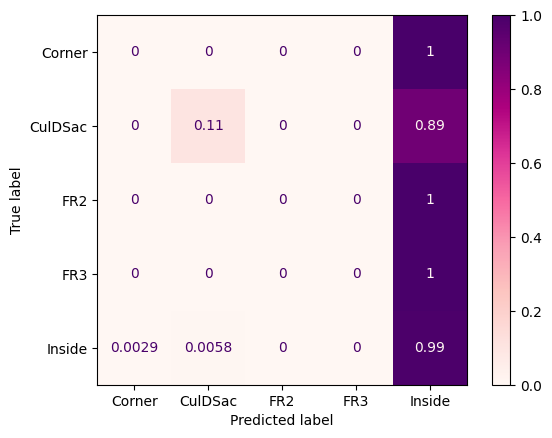

In [93]:
ConfusionMatrixDisplay.from_estimator(
        model,
        X_val_prep,
        y_val,
        display_labels=Label.classes_,
         cmap=plt.cm.RdPu,
        normalize='true',
    );

по всей матрице

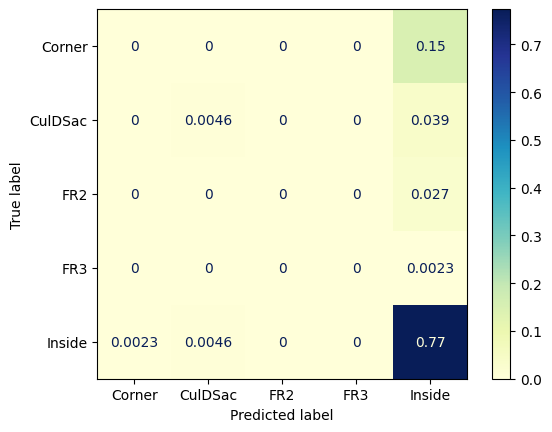

In [94]:
ConfusionMatrixDisplay.from_estimator(
        model,
        X_val_prep,
        y_val,
        display_labels=Label.classes_,
         cmap=plt.cm.YlGnBu,
        normalize='all',
    );

не нормированная

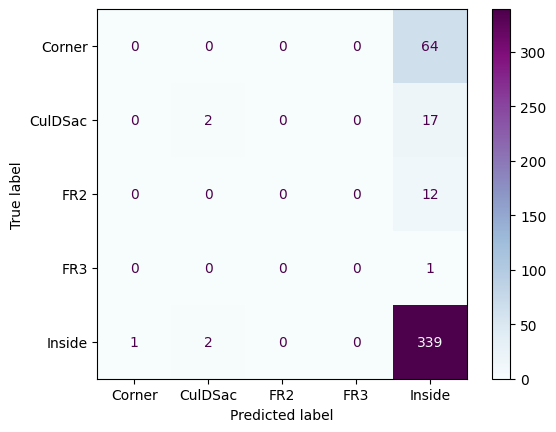

In [95]:
ConfusionMatrixDisplay.from_estimator(
        model,
        X_val_prep,
        y_val,
        display_labels=Label.classes_,
         cmap=plt.cm.BuPu,

    );

Судя по матрицам ошибок, модель почти всегда предсказывает класс Inside, что подтверждается высокой точностью (0.99, 0.77, 399) для этого класса и значительным количеством ошибок для остальных классов. Она плохо распознаёт классы Corner, FR2, FR3 и слабо отличает CulDSac. Опять же, проблема редких значений.

# Объединяем Pipeline Предобработки и Модель

In [96]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', LogisticRegression(random_state = 42))
])

In [97]:
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_lotArea',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler())]),
                                 ['LotArea']),
                                ('num_GarArea',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['GarageArea']),
                                ('num_BAG',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['BedroomAbvGr']),
                                ('num_YB',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['YearBuilt']),
                                ('num_moSold',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MoSold']),
                                ('num_SP',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['SalePrice'])])

In [98]:
pipe_num['model']

LogisticRegression(random_state=42)

In [99]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num_BAG',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['BedroomAbvGr']),
                                                 ('num_YB',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['YearBuilt']),
                                                 ('num_moSold',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MoSold']),
                                                 ('num_SP',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['SalePrice'])])),
                ('model', LogisticRegression(random_state=42))])

In [100]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
1.223+0.04*LotArea+0.11*GarageArea+0.03*BedroomAbvGr-0.43*YearBuilt-0.11*MoSold-0.04*SalePrice


In [101]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.5784
f1 на валидационной выборке: 0.6906


In [102]:
print(classification_report(y_val, pipe_num.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

      Corner       0.00      0.00      0.00        64
     CulDSac       0.50      0.11      0.17        19
         FR2       0.00      0.00      0.00        12
         FR3       0.00      0.00      0.00         1
      Inside       0.78      0.99      0.87       342

    accuracy                           0.78       438
   macro avg       0.26      0.22      0.21       438
weighted avg       0.63      0.78      0.69       438



In [103]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.062631,0.021813,0.692683,0.692683,0.479810,0.200000
1,0.048635,0.021945,0.697561,0.697561,0.555332,0.213333
2,0.048614,0.021649,0.696078,0.696078,0.484525,0.250000
3,0.046042,0.020725,0.686275,0.686275,0.571350,0.265874
4,0.050648,0.018802,0.686275,0.686275,0.504588,0.209108




test_ACC          0.691774
test_F1           0.691774
test_Precision    0.519121
test_Recall       0.227663
dtype: float64


# Влияние категориальных признаков

In [104]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', LogisticRegression(random_state = 42))
    ])

In [105]:
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num...
                                                                                 sparse_output=False))]),
                                                  ['Utilities']),
                                                 ('cat_con1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Condition1']),
                                                 ('cat_roofSt',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['RoofStyle'])])),
                ('model', LogisticRegression(random_state=42))])

In [106]:
cat_street_names = pipe_all['preprocessors'].transformers_[5][1]['encoder'].get_feature_names_out(cat_street)
cat_util_names = pipe_all['preprocessors'].transformers_[6][1]['encoder'].get_feature_names_out(cat_util)
cat_con1_names = pipe_all['preprocessors'].transformers_[7][1]['encoder'].get_feature_names_out(cat_con1)
cat_roofSt_names = pipe_all['preprocessors'].transformers_[8][1]['encoder'].get_feature_names_out(cat_roofSt)


# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    num_SP,
                    cat_street_names,
                    cat_util_names,
                    cat_con1_names,
                    cat_roofSt_names,])

In [107]:
B0, B = get_coefs(pipe_all['model'])
features_names = list(columns)

print_model (B0,B,features_names)

Решение
1.341+0.07*LotArea+0.07*GarageArea+0.03*BedroomAbvGr-0.42*YearBuilt-0.09*MoSold-0.43*SalePrice-0.26*Street_Pave+0.69*Utilities_NoSeWa+0.27*Condition1_Artery-0.00*Condition1_Feedr+0.26*Condition1_Norm-0.41*Condition1_PosA-0.78*Condition1_PosN-0.55*Condition1_RRAe+0.58*Condition1_RRAn-0.07*Condition1_RRNe-0.43*Condition1_RRNn+0.35*RoofStyle_Flat-0.44*RoofStyle_Gable+0.26*RoofStyle_Gambrel+0.55*RoofStyle_Hip-0.29*RoofStyle_Mansard


**Модификация функции для отрисовки весов**

In [108]:
#Отрисовка весов с фильтром
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [109]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs, columns, 0,  width = 1600)

In [110]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.5950
f1 на валидационной выборке: 0.6855


In [111]:
print(classification_report(y_val, pipe_all.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

      Corner       0.00      0.00      0.00        64
     CulDSac       0.33      0.11      0.16        19
         FR2       0.00      0.00      0.00        12
         FR3       0.00      0.00      0.00         1
      Inside       0.78      0.98      0.87       342

    accuracy                           0.77       438
   macro avg       0.22      0.22      0.21       438
weighted avg       0.62      0.77      0.69       438



In [112]:
cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.090031,0.022656,0.692683,0.692683,0.548547,0.203592
1,0.077338,0.026625,0.702439,0.702439,0.679659,0.210000
2,0.069517,0.021734,0.681373,0.681373,0.557604,0.264114
3,0.069298,0.020305,0.676471,0.676471,0.595438,0.266843
4,0.061169,0.022990,0.686275,0.686275,0.510715,0.209108




test_ACC          0.687848
test_F1           0.687848
test_Precision    0.578393
test_Recall       0.230731
dtype: float64


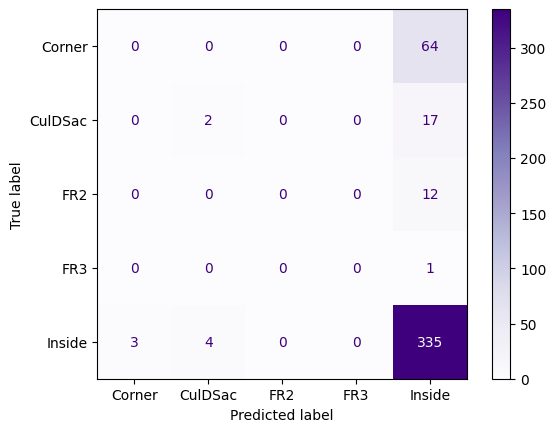

In [113]:
ConfusionMatrixDisplay.from_estimator(
        pipe_all,
        X_val,
        y_val,
        display_labels=Label.classes_,
         cmap=plt.cm.Purples,

    );

Моедль почти не изменилась, если только в худшую сторону, так как метрики понизились и класс Inside стал больше определятся как Corner и CulDSac

# Сохраняем модель

In [114]:
from joblib import dump, load # в scikit-learn ничего такого особенного нет
# пользуемся joblib

In [115]:
dump(model, 'model.joblib')  # чтобы сохранить объект
dump(pipe_num, 'pipe_num.joblib')  # чтобы сохранить объект
dump(pipe_all, 'pipe_all.joblib')  # чтобы сохранить объект

['pipe_all.joblib']

In [116]:
pipe_load = load('pipe_all.joblib')  # чтобы загрузить из файла в формате joblib

In [117]:
pipe_load

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num...
                                                                                 sparse_output=False))]),
                                                  ['Utilities']),
                                                 ('cat_con1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Condition1']),
                                                 ('cat_roofSt',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['RoofStyle'])])),
                ('model', LogisticRegression(random_state=42))])